In [40]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [48]:
# Load the cleaned dataset
file_path = "Final_Complete_Subdivisions_Home_Values.csv"  
df_cleaned = pd.read_csv(file_path)

# Get the unique count of subdivisions
unique_subdivisions_count = df_cleaned["Subdivision"].nunique()

# Get the list of unique subdivisions
unique_subdivisions_list = df_cleaned["Subdivision"].unique()

# Display the results
print(f"Total Unique Subdivisions: {unique_subdivisions_count}")
print("List of Unique Subdivisions:")
for subdivision in unique_subdivisions_list:
    print(subdivision)


Total Unique Subdivisions: 23
List of Unique Subdivisions:
Beavercreek CCD, Clackamas County, Oregon
Beaverton-Hillsboro CCD, Washington County, Oregon
Canby CCD, Clackamas County, Oregon
Chehalem Mountains CCD, Washington County, Oregon
Coast Range CCD, Washington County, Oregon
Colton CCD, Clackamas County, Oregon
Corbett CCD, Multnomah County, Oregon
Estacada CCD, Clackamas County, Oregon
Forest Grove-Cornelius CCD, Washington County, Oregon
Gresham CCD, Multnomah County, Oregon
Molalla CCD, Clackamas County, Oregon
Mount Hood CCD, Clackamas County, Oregon
Mulino CCD, Clackamas County, Oregon
North Plains CCD, Washington County, Oregon
Northwest Clackamas CCD, Clackamas County, Oregon
Portland East CCD, Multnomah County, Oregon
Portland West CCD, Multnomah County, Oregon
Redland CCD, Clackamas County, Oregon
Rockcreek CCD, Washington County, Oregon
Sandy CCD, Clackamas County, Oregon
Skyline CCD, Multnomah County, Oregon
Wilsonville CCD, Clackamas County, Oregon
Yoder CCD, Clackamas

In [41]:

# Load the cleaned dataset
file_path = "Final_Complete_Subdivisions_Home_Values.csv"  
df_cleaned = pd.read_csv(file_path)

# Select only relevant columns
df_selected = df_cleaned[["Subdivision", "Year", "Median Home Value"]]

# Filter data for years 2019-2023
df_filtered = df_selected[df_selected["Year"].isin([2019, 2020, 2021, 2022, 2023])]

# Reshape the DataFrame to have each subdivision as a row and years as columns
df_wide = df_filtered.pivot(index="Subdivision", columns="Year", values="Median Home Value").reset_index()

# Rename the columns for clarity
df_wide.columns.name = None  # Remove the automatic column name
df_wide.columns = ["Subdivision", "2019", "2020", "2021", "2022", "2023"]

# Remove "Oregon" from the subdivision names
df_wide["Subdivision"] = df_wide["Subdivision"].str.replace(", Oregon", "", regex=False)

# Display the final structured DataFrame
from IPython.display import display
display(df_wide)


,Subdivision,2019,2020,2021,2022,2023
0,"Beavercreek CCD, Clackamas County",468400,501200,522900,644600,660600
1,"Beaverton-Hillsboro CCD, Washington County",384400,410900,436300,501200,556000
2,"Canby CCD, Clackamas County",334100,365500,390600,455000,484700
3,"Chehalem Mountains CCD, Washington County",478000,495800,549600,660500,645300
4,"Coast Range CCD, Washington County",433800,453800,455700,507000,550200
5,"Colton CCD, Clackamas County",347400,391500,440700,493300,555400
6,"Corbett CCD, Multnomah County",422500,461700,496400,609400,654100
7,"Estacada CCD, Clackamas County",368800,392700,431200,511800,572400
8,"Forest Grove-Cornelius CCD, Washington County",304400,339100,366600,429100,457200
9,"Gresham CCD, Multnomah County",294300,324300,348600,410900,438300


In [42]:
# Load the cleaned dataset
file_path = "Final_Complete_Subdivisions_Home_Values.csv"  
df_cleaned = pd.read_csv(file_path)

# Select only relevant columns
df_selected = df_cleaned[["Subdivision", "Year", "Median Home Value"]]

# Filter data for years 2019-2023
df_filtered = df_selected[df_selected["Year"].isin([2019, 2020, 2021, 2022, 2023])]

# Reshape the DataFrame to have each subdivision as a row and years as columns
df_wide = df_filtered.pivot(index="Subdivision", columns="Year", values="Median Home Value").reset_index()

# Rename the columns for clarity
df_wide.columns.name = None  # Remove the automatic column name
df_wide.columns = ["Subdivision", "2019", "2020", "2021", "2022", "2023"]

# Remove "Oregon" from the subdivision names
df_wide["Subdivision"] = df_wide["Subdivision"].str.replace(", Oregon", "", regex=False)

# Find the most expensive subdivision for each year
df_most_expensive = df_wide.set_index("Subdivision").idxmax().to_frame(name="Most Expensive Subdivision")

# Reset index for better readability
df_most_expensive.reset_index(inplace=True)
df_most_expensive.rename(columns={"index": "Year"}, inplace=True)

# Display the result
from IPython.display import display
display(df_most_expensive)


,Year,Most Expensive Subdivision
0,2019,"Skyline CCD, Multnomah County"
1,2020,"Skyline CCD, Multnomah County"
2,2021,"Skyline CCD, Multnomah County"
3,2022,"Skyline CCD, Multnomah County"
4,2023,"Skyline CCD, Multnomah County"


In [43]:

# Find the least expensive subdivision for each year
df_least_expensive = df_wide.set_index("Subdivision").idxmin().to_frame(name="Least Expensive Subdivision")

# Reset index for better readability
df_least_expensive.reset_index(inplace=True)
df_least_expensive.rename(columns={"index": "Year"}, inplace=True)

# Display the result
from IPython.display import display
display(df_least_expensive)


,Year,Least Expensive Subdivision
0,2019,"Gresham CCD, Multnomah County"
1,2020,"Gresham CCD, Multnomah County"
2,2021,"Gresham CCD, Multnomah County"
3,2022,"Molalla CCD, Clackamas County"
4,2023,"Gresham CCD, Multnomah County"


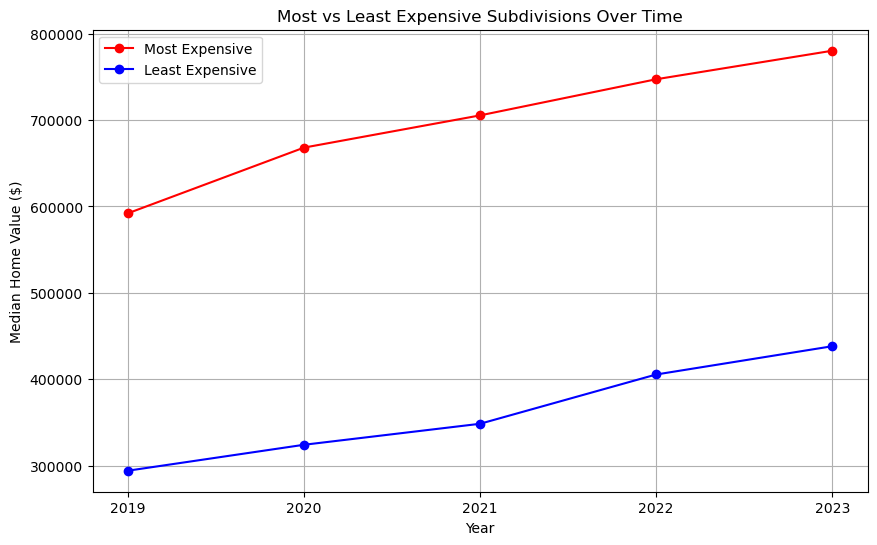

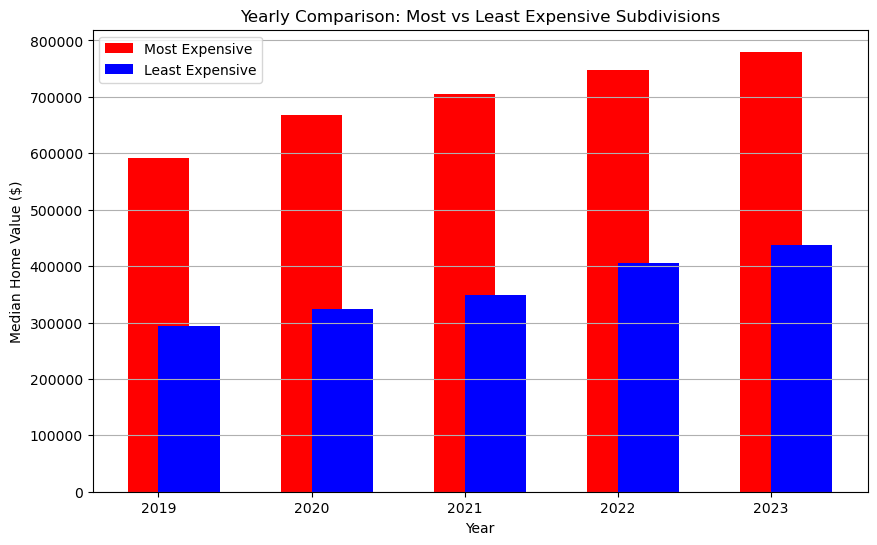

In [44]:
# Extract data for most and least expensive subdivisions
most_expensive_subdivisions = df_wide.set_index("Subdivision").idxmax()
least_expensive_subdivisions = df_wide.set_index("Subdivision").idxmin()

# Extract corresponding values for each year
most_expensive_values = df_wide.set_index("Subdivision").max()
least_expensive_values = df_wide.set_index("Subdivision").min()

# Convert to DataFrame for easier plotting
df_comparison = pd.DataFrame({
    "Year": most_expensive_values.index.astype(str),
    "Most Expensive Value": most_expensive_values.values,
    "Least Expensive Value": least_expensive_values.values,
    "Most Expensive Subdivision": most_expensive_subdivisions.values,
    "Least Expensive Subdivision": least_expensive_subdivisions.values
})

# Line Chart - Trend Over Time
plt.figure(figsize=(10, 6))
plt.plot(df_comparison["Year"], df_comparison["Most Expensive Value"], marker='o', label="Most Expensive", color='red')
plt.plot(df_comparison["Year"], df_comparison["Least Expensive Value"], marker='o', label="Least Expensive", color='blue')
plt.xlabel("Year")
plt.ylabel("Median Home Value ($)")
plt.title("Most vs Least Expensive Subdivisions Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Bar Chart - Yearly Comparison
plt.figure(figsize=(10, 6))
bar_width = 0.4
x_labels = df_comparison["Year"]
x_indices = range(len(x_labels))

plt.bar(x_indices, df_comparison["Most Expensive Value"], width=bar_width, label="Most Expensive", color='red', align='center')
plt.bar(x_indices, df_comparison["Least Expensive Value"], width=bar_width, label="Least Expensive", color='blue', align='edge')
plt.xticks(ticks=x_indices, labels=x_labels)
plt.xlabel("Year")
plt.ylabel("Median Home Value ($)")
plt.title("Yearly Comparison: Most vs Least Expensive Subdivisions")
plt.legend()
plt.grid(axis="y")
plt.show()


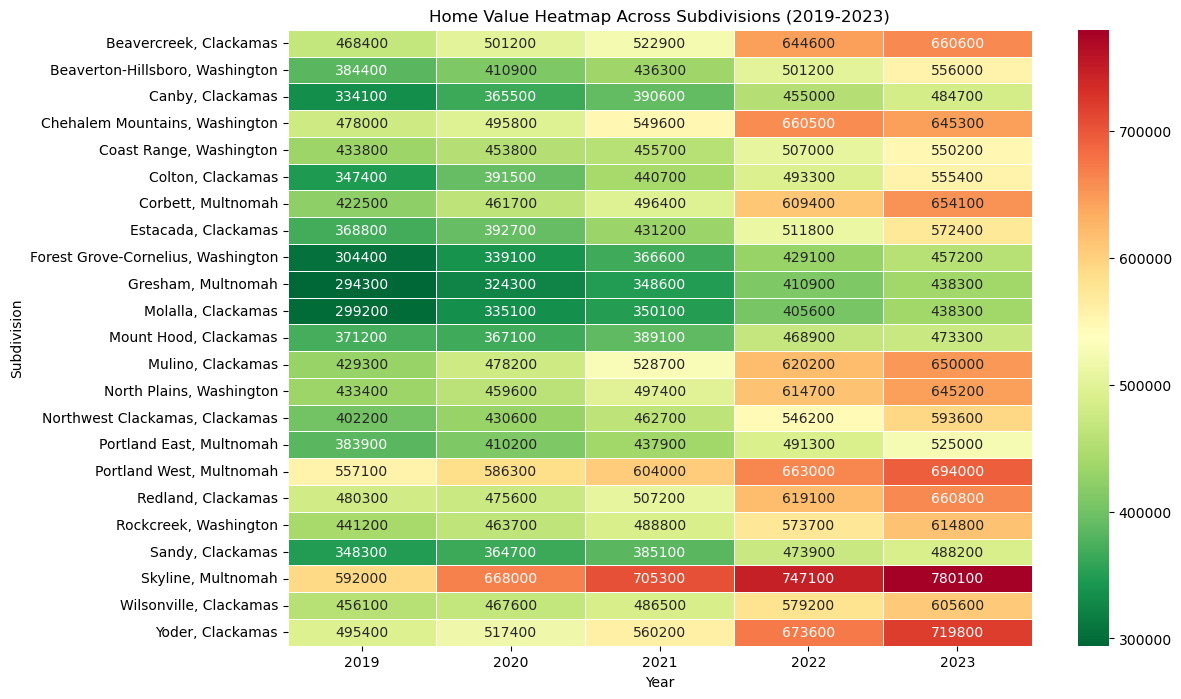

In [45]:
# Remove "CCD" and "County" from subdivision names
df_wide["Subdivision"] = df_wide["Subdivision"].str.replace(" CCD", "", regex=False)
df_wide["Subdivision"] = df_wide["Subdivision"].str.replace(" County", "", regex=False)

# Create a heatmap for each subdivision with a red-to-green color scale
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_wide.set_index("Subdivision"), 
    annot=True, 
    fmt=".0f", 
    cmap="RdYlGn_r",  # Red for expensive, Green for least expensive
    linewidths=0.5
)

# Customize the plot
plt.title("Home Value Heatmap Across Subdivisions (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Subdivision")

# Show the heatmap
plt.show()


In [46]:
# Load the cleaned data
file_path = "Cleaned_Subdivisions_Data.csv"  
df_cleaned = pd.read_csv(file_path)

# Filter for the latest available year
latest_year = df_cleaned["Year"].max()
df_latest = df_cleaned[df_cleaned["Year"] == latest_year].dropna(subset=["Latitude", "Longitude"])

# Create an interactive scatter map with custom color scale
fig = px.scatter_mapbox(
    df_latest,
    lat='Latitude',
    lon='Longitude',
    size="Median Home Value",
    color="Median Home Value",
    hover_name="Subdivision",
    hover_data=["County", "Median Home Value", "Year"],
    mapbox_style="carto-positron",
    color_continuous_scale=["green", "yellow", "red"],  # Custom color scale
    title=f"Median Home Values by Subdivision ({latest_year})"
)

# Increase figure size
fig.update_layout(
    autosize=True,
    width=1200,
    height=800
)

# Display the map
fig.show()


In [47]:
# Load the cleaned data
file_path = "Final_Complete_Subdivisions_Home_Values.csv"  
df_cleaned = pd.read_csv(file_path)

# Drop rows with missing latitude and longitude values
df_cleaned = df_cleaned.dropna(subset=["Latitude", "Longitude"])

# Create an interactive scatter map including all years
fig = px.scatter_mapbox(
    df_cleaned,
    lat='Latitude',
    lon='Longitude',
    size="Median Home Value",
    color="Median Home Value",
    hover_name="Subdivision",
    hover_data=["County", "Median Home Value", "Year"],
    animation_frame="Year",  # Include all years with animation
    mapbox_style="carto-positron",
    color_continuous_scale=["green", "yellow", "red"],  # Custom color scale
    title="Median Home Values by Subdivisions Over the Years"
)

# Increase figure size
fig.update_layout(
    autosize=True,
    width=1200,
    height=800
)

# Display the map
fig.show()
